# **House Price Prediction Using Machine Learning**
---

### **M606 Machine Learning Final Project**
### **Name: Çağdaş Bıyıklıoğlu - GH1032664**

---
### **INTRODUCTION**

House Prediction Project is aiming to predict the house sale prices in the King County,USA(Seattle) by using the Machine Learning Regression models.

Nowadays Accurate house prediction is an very important issue and in the real estate analytics has to support buyers,sellers and investors in making them informed by the financial informations.

So in this project by analysing historical housing data and property characteristics the machine learning techniques were applied to model the complicated and nonlinear relationship.These relationships are house's features and house sale prices.

---

### **DATASET**

The dataset used in House Prediction Project is “House Sales in King County, USA” which containing information about the residential propertiess sold between the May 2014 and May 2015.

---

#### **Dataset Features**

- Count of the bedroom and bathroom

- Count of the floors

- Living area and lot size

- Geographical information

- View of the Waterfront and house's condition

- The target variable of this study is house sale price which is price

---

#### **Problem Statement**

Real estate market involves in complex pricing decisions and making accurate price estimation is a crucial yet challenging task.Therefore accurate house price prediction is very important because pricing mistakes can lead to bad financial losses.So this project adresses the business problem of predicting house prices to support the real estate companies in order to benefit them and reduce pricing uncertainty.Therefore reliable price predictions can improve valuation efficiency and help the companies.Relevant data collected from publicy available database records.
In addition the problem is formulated as a supervised machine learning regression task where house attributes are used as input features and sale price defined as target.

**Objective of the Project**

- Analysing the relationships between housing features and the sale prices

- Comparation of many regression model by their performance

- Determine the best performing model according to the standard evauluation metrics

---

#### **Machine Learning Models Used**

- Decision Tree Regression

- Random Forest Regression

- Linear Regression


Classification based models like Logistic Regressionn and the Naive Bayes weren't used because of the problem is a regression task.

---
#### **Machine Learning Pipeline**

- Business Problem Understanding
- Data Collection
- Data Exploration
- Model Training
- Feature Engineering
- Data Preprocessing
- Model Evaluation
- Post-Model Steps
---
#### **Dataset Download Link**

The dataset is publicly available on Kaggle and can be downloaded from the provided following link:

**Dataset:** House Sale in the King County(USA)

**File:** kc_house_data.csv

**Link:** https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

---

#### **Project Repository on GitHub**

The project's implementation including the data preprocessing,model training,evaluation and analysis can be accessed on the Github:

GitHub Repository: https://github.com/Relexan/Machine-Learning-Final-Project.git





## **Importing the necessary libraries**

---
In order to build the pipeline several libraries are imported.

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import HTML, display
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


### **Reading the File**

The dataset is loaded into the environment and assigned into the dataset
variable.


In [58]:
dataset = pd.read_csv("kc_house_data.csv")

## **DATA EXPLORATION**
---

Data exploration is performed in order to gain initial understanding of the dataset.First rows of the dataset is displayed,then all the info from dataset is being displayed.Then checked for missing data in the columns.

The dataset doesn't contain any missing values,but it may include outliers in the target variable which is price and some highly skewed numeric features,which also can affect model performance,other than that dataset doesn't have any quality issues.This is a regression problem therefore no sampling or class balancing is required.

MAE,RMSE and R² are suitable for this regression task because of they quantify prediction error in the same unit as price therefore they measure how well the model explains variance in house prices.




In [59]:
display(dataset.head(10))

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [60]:
display(dataset.describe(include="all").T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,21613.0,NaN,NaN,NaN,4580301520.864988,2876565571.312049,1000102.0,2123049194.0,3904930410.0,7308900445.0,9900000190.0
date,21613,372,20140623T000000,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,21613.0,NaN,NaN,NaN,540088.141767,367127.196483,75000.0,321950.0,450000.0,645000.0,7700000.0
bedrooms,21613.0,NaN,NaN,NaN,3.370842,0.930062,0.0,3.0,3.0,4.0,33.0
bathrooms,21613.0,NaN,NaN,NaN,2.114757,0.770163,0.0,1.75,2.25,2.5,8.0
sqft_living,21613.0,NaN,NaN,NaN,2079.899736,918.440897,290.0,1427.0,1910.0,2550.0,13540.0
sqft_lot,21613.0,NaN,NaN,NaN,15106.967566,41420.511515,520.0,5040.0,7618.0,10688.0,1651359.0
floors,21613.0,NaN,NaN,NaN,1.494309,0.539989,1.0,1.0,1.5,2.0,3.5
waterfront,21613.0,NaN,NaN,NaN,0.007542,0.086517,0.0,0.0,0.0,0.0,1.0
view,21613.0,NaN,NaN,NaN,0.234303,0.766318,0.0,0.0,0.0,0.0,4.0


In [61]:
display(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

None

The graph and missing count shows that there is no missing columns.

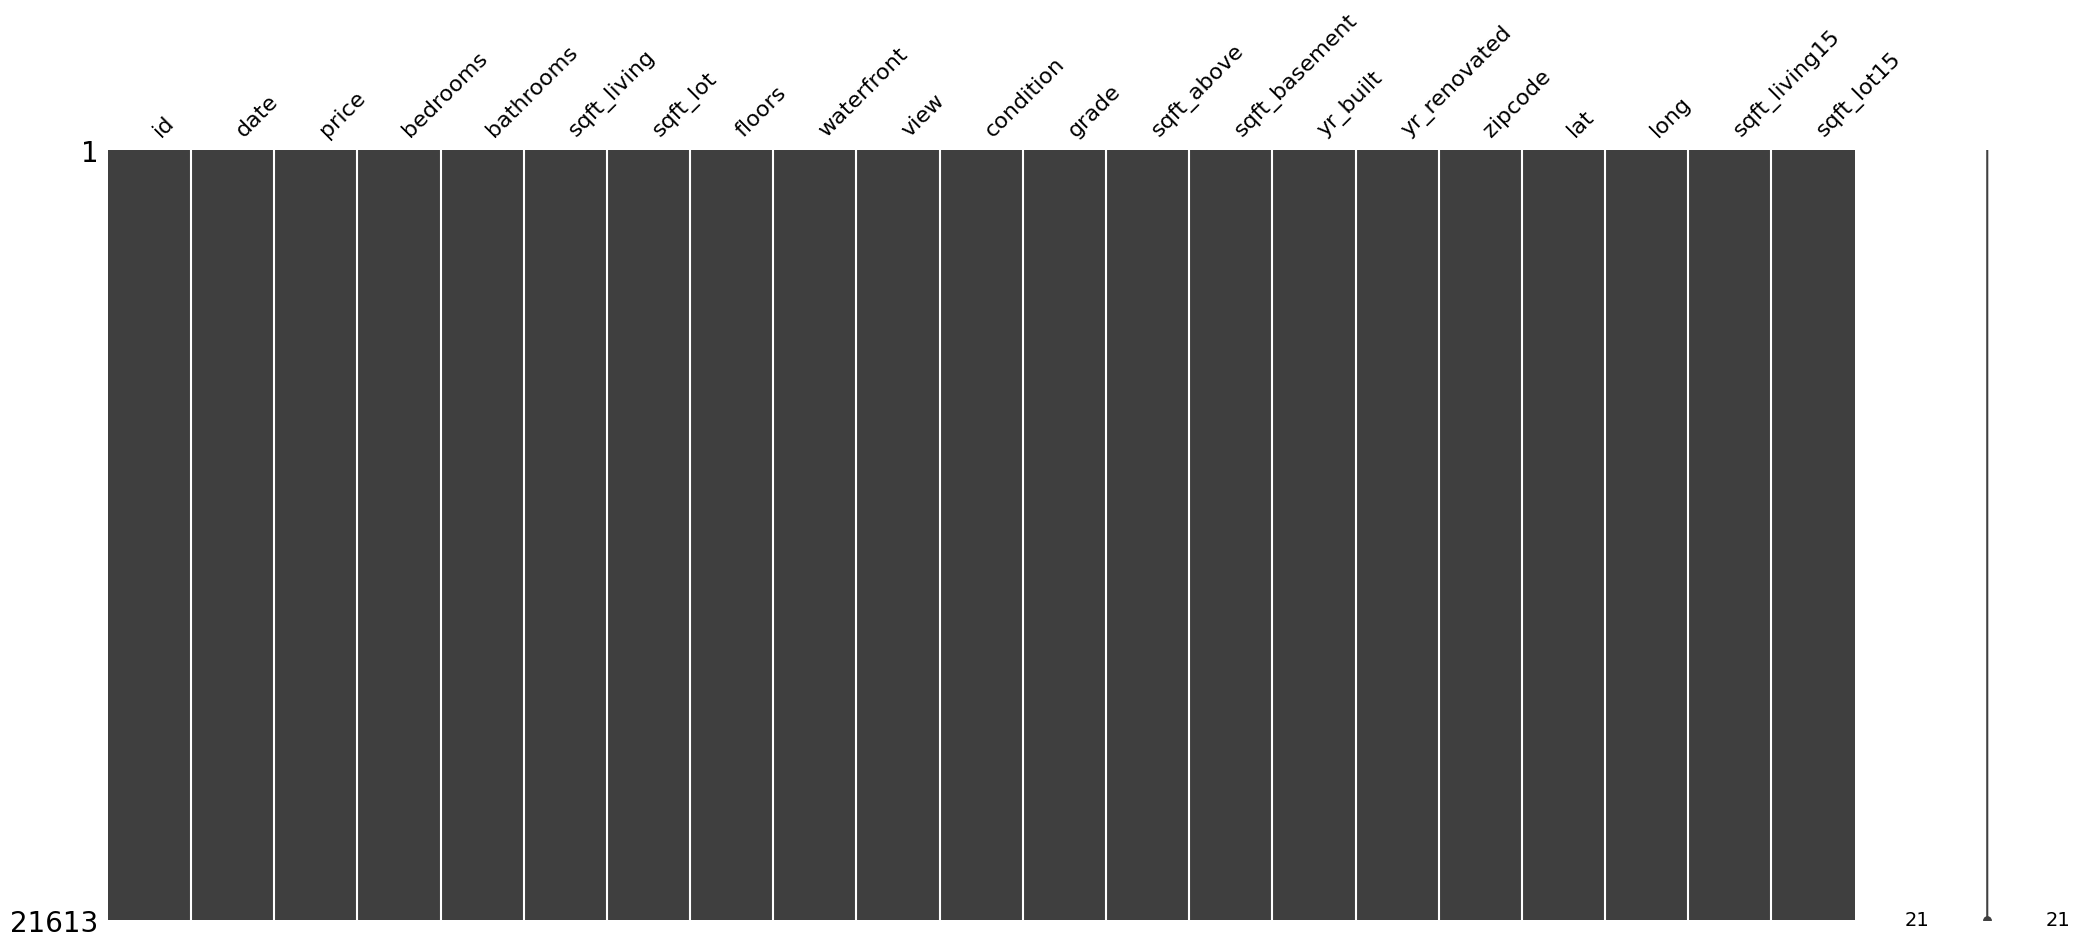

In [62]:
msno.matrix(dataset)
plt.show()

In [63]:
missing_count = dataset.isnull().sum()
missing_percent = (missing_count / len(dataset)) * 100

display(int(missing_count.sum()))


0

Examining the distribution of house prices in order to understand overall pricing patterns before modeling.

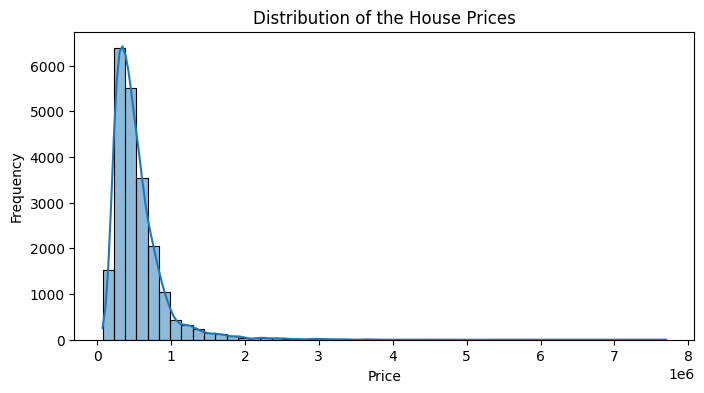

In [64]:
plt.figure(figsize=(8,4))
sns.histplot(dataset["price"], bins=50, kde=True)
plt.title("Distribution of the House Prices")
plt.xlabel("Price"); plt.ylabel("Frequency")
plt.show()


This heatmap is visualising the correlation between numerical features in the dataset,allowing identification of variables that have strong positive or negative relationships in the house prices.


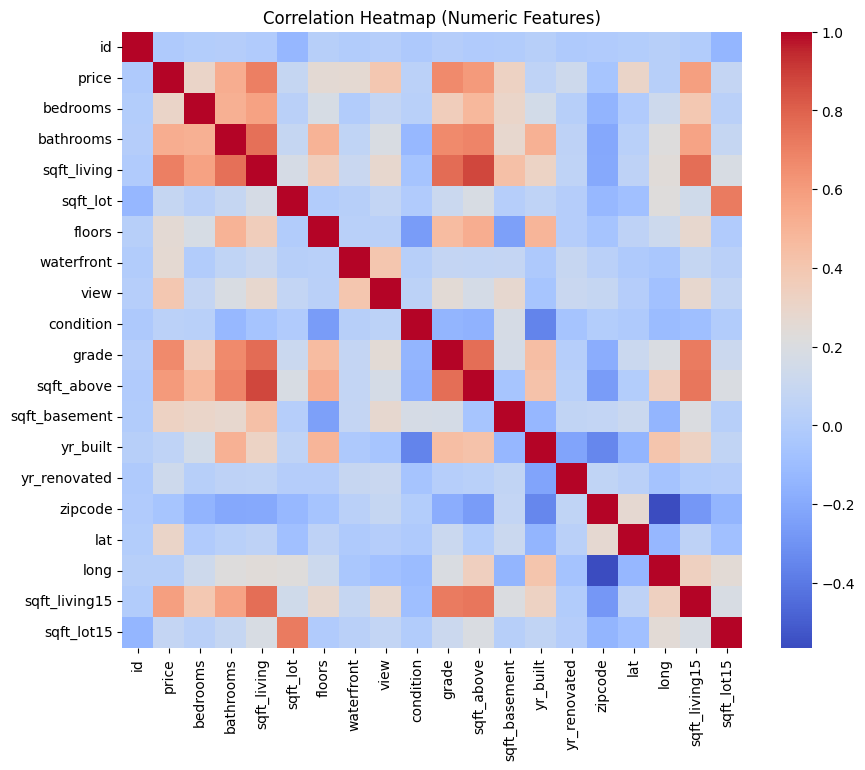

In [65]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.select_dtypes(include=[np.number]).corr(),
            cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

This is a scatter plot and it shows relationship between living area and house prices.It shows how property size influences pricing.

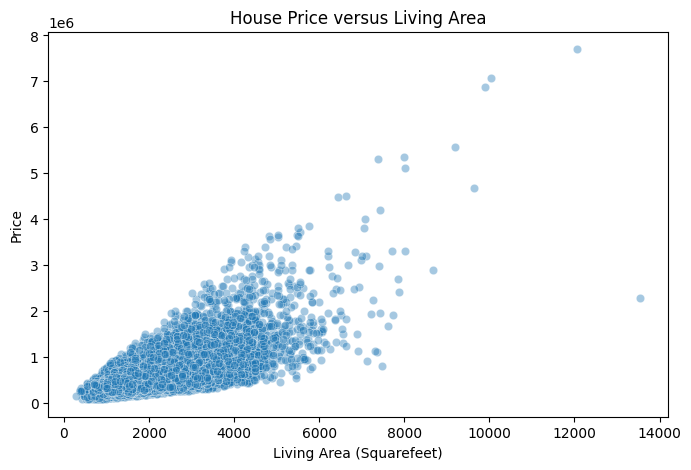

In [66]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=dataset["sqft_living"], y=dataset["price"], alpha=0.4)
plt.title("House Price versus Living Area")
plt.xlabel("Living Area (Squarefeet)")
plt.ylabel("Price")
plt.show()

## **DATA PREPROCESSING**
---
Dropping the id column as it's not needed.Data cleaning was performed by removing irrelevant features,correcting data types and verifying that there is no missing value exists in my dataset.Also I want to mention that Data resampling wasn't applied as the problem is a regression task and doesn't involve class imbalance.

In [67]:
dataset = dataset.drop(columns=["id"])

The date column was converted to datetime format in order to make it usable for the machine learning model.
From this datetime information year and month features are being extracted to capture potential temporal patterns in the house sales.After extracting them,these meaningful time basef features,the original date column is removed to avoid the redundancy and ensure that the dataset contains only numerical and model frienldy variables.

In [68]:
dataset["date"] = pd.to_datetime(dataset["date"], format="%Y%m%dT%H%M%S")

dataset["sale_year"] = dataset["date"].dt.year
dataset["sale_month"] = dataset["date"].dt.month

dataset = dataset.drop(columns=["date"])

Here the dataset is being split into input features which is X and the target variable which is y,where house price is defined as the prediction target.
This seperation also is a very crucial preprocessing step that prepares the data for supervised learning models by clearly distinguishing independent variables from the dependent variable.


In [69]:
X = dataset.drop(columns=["price"])
y = dataset["price"]

print("Feature matrix's shape is:", X.shape)
print("Target vector's shape is:", y.shape)

Feature matrix's shape is: (21613, 20)
Target vector's shape is: (21613,)


The dataset contains no missing values and all features are numerical which makes it fully suitable for my machine learning model.

In [70]:
print("Missing in the X:", X.isnull().sum().sum())
print("Is there any non numeric columns in the X?:",
    X.select_dtypes(exclude=[np.number]).columns.tolist())

Missing in the X: 0
Is there any non numeric columns in the X?: []


So,in this stage the dataset splited in test and training set in order to be sure of that model's performance can be evaulated on the unseen data.This step is also a part of data preprocessing and helps prevent data leakage while enabling reliable model evaluation.Also test set is 20 percent meanwhile training set is 80 percent of the dataset.That value is being set in (test_size = 0.2) part.

In [71]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
    )

print(X_train.shape, X_test.shape)

(17290, 20) (4323, 20)


## **FEATURE ENGINEERING**
---
In Feature Engineering Feature scaling was implemented in order to ensure that the all input variables contributes equally to the learning process.Also new features are created before scaling to ensure that all variables,including engineered features, are standardised consistently.Current year is set to 2015 in order to calculate the age of each house based on the dataset's time range.

In [72]:
current_year = 2015
X_train["house_age"] = current_year - X_train["yr_built"]
X_test["house_age"] = current_year - X_test["yr_built"]

A new feature called as total_sqft is created by combining living area and basement area to represent the total usable space of the property.This feature provides more comprehensive measure of the house size.

In [73]:
X_train["total_sqft"] = X_train["sqft_living"] + X_train["sqft_basement"]
X_test["total_sqft"] = X_test["sqft_living"] + X_test["sqft_basement"]

is_renovated is a binary feature and its created in order to indicate whether a house has been renovated or not.This feature simplifies the renovation information into a clear categorical signal and allows model to capture the potential impact of renovation status on houses prices.



In [74]:
X_train["is_renovated"] = (X_train["yr_renovated"] > 0).astype(int)
X_test["is_renovated"] = (X_test["yr_renovated"] > 0).astype(int)

## **FEATURE SCALING**

---
Feature scaling is applied to be sure of that all numerical features can comparably contribute to learning process.Feature Scaling happened just after the Feature Engineering.Here Standard Scaler is being used to normalise the feature distributions by removing the scaling and mean for unit variance which are especially important for regression models sensitive to feature magnitude.Feature magnitude means numerical scale or range of a feature's values where some features may have much larger values than the others and potentially dominating the learning process if it is not scaled properly.

---

StandardScaler was applied to rescale feature so like that they are centered at 0 with the unit's variance.Also that step is improving model convergence and performance,especially for regression models sensitive to feature magnitude.



In [75]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled training shape is:", X_train_scaled.shape)
print("Scaled test shape is:", X_test_scaled.shape)

Scaled training shape is: (17290, 23)
Scaled test shape is: (4323, 23)


## **MODEL TRAINING**

---
Different kinds of machine learning algorithms were trained in the project and evaluated to compare their performance.Linear Regression is being used as a reference(in other words baseline) model and also Decision Tree and Random Forest models employed in order to identify the non linear relationships and improve the predictive accuracy.Also Grid Search was applied in order to each model to perform basic hyperparameter tuning using cross validation.Therefore best modell configurations were chosen according to their R² score.Also Model validation was performed using 5 fold cross validation(cv=5 in code) within Grid Search.

---

Linear Regression model was trainedd using the scaled training data.The purpose of that is to understand the relationship among input features and different house prices.After training those models,they were used in order to generate price prediction in scaled test dataset.This provides a baseline performance for comparison with more complex models.



In [76]:
linear_regression = LinearRegression()

param_grid_linear = {
    "fit_intercept": [True, False]
}

grid_linear = GridSearchCV(
    linear_regression,
    param_grid_linear,
    cv=5,
    scoring="r2"
)

grid_linear.fit(X_train_scaled, y_train)

best_linear = grid_linear.best_estimator_

y_pred_linear = best_linear.predict(X_test_scaled)

In [77]:
decision_tree = DecisionTreeRegressor(random_state=42)

param_grid_decision_tree = {
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 10]
}

grid_decision_tree = GridSearchCV(
    decision_tree,
    param_grid_decision_tree,
    cv=5,
    scoring="r2"
)

grid_decision_tree.fit(X_train_scaled, y_train)

best_decision_tree = grid_decision_tree.best_estimator_

y_pred_decision_tree = best_decision_tree.predict(X_test_scaled)

In [78]:
random_forest = RandomForestRegressor(random_state=42)

param_grid_random_forest = {
    "n_estimators": [100,200],
    "max_depth": [None, 10]
}

grid_random_forest = GridSearchCV(
    random_forest,
    param_grid_random_forest,
    cv=5,
    scoring="r2"
)

grid_random_forest.fit(X_train_scaled, y_train)

best_random_forest = grid_random_forest.best_estimator_

y_pred_random_forest = best_random_forest.predict(X_test_scaled)

## **MODEL EVALUATION**

---

Trained models evaulated in test dataset.Evaluation metrics are Root Mean Squared Error(RMSE),Mean Absolute Error(MAE) and R² score.Thus,these metrics was used in order to determine the best performing regression model and compare the model's performance.

In [79]:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print(f"{model_name} Results:")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"R² Score: {r2:.3f}")


Random Forest Regressor achieved best performance in comparison to other models.Therefore this is indicating that the emsemble based approach is more effective in capturing the complicated relationships in housing data compared to simpler models.


In [80]:
evaluate_model(y_test, y_pred_linear, "Linear Regression")

Linear Regression Results:
Mean Absolute Error: 126642.29
Root Mean Squared Error: 211492.53
R² Score: 0.704


In [81]:
evaluate_model(y_test, y_pred_decision_tree, "Decision Tree")

Decision Tree Results:
Mean Absolute Error: 96319.79
Root Mean Squared Error: 187944.78
R² Score: 0.766


In [82]:
evaluate_model(y_test, y_pred_random_forest, "Random Forest")

Random Forest Results:
Mean Absolute Error: 73050.77
Root Mean Squared Error: 152793.17
R² Score: 0.846


## **Feature Importance**

---

So this analysis shows the most important features used by the Random Forest model in order to predict house prices.This privdes model explainability by highlighting which property characteristics contribute most to the prediction process.As you can see new feature total_sqft is also an important feature.

In [83]:
importances = best_random_forest.feature_importances_
feature_names = X_train.columns

feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

display(feature_importance_df.head(10))

,Feature,Importance
8,grade,0.317647
2,sqft_living,0.227484
14,lat,0.151602
15,long,0.059625
21,total_sqft,0.054539
5,waterfront,0.030641
16,sqft_living15,0.029384
9,sqft_above,0.020538
11,yr_built,0.017424
20,house_age,0.014793


## **Model Validation and Overfitting Analysis**

---

So this comparison eveluates the consistency between the cross validation performance and test set performance of Random Forest.The similarity in cross validated R² and the test R² score indicates House Price Prediction model is generalising good to the unseen data and actually doesn't suffer from overfitting.This confirms that the selected hyperparameters and the configurationn are reliable.So also I want to mention that the small difference(0.03) between the cross validation and test R² scores is indicating that the model hasn't memorized the training data and generalises well to the unseen examples in this project.


In [84]:
print("Best CV R²:", grid_random_forest.best_score_)
print("Test R²:", r2_score(y_test, y_pred_random_forest))

Best CV R²: 0.8770802556944034
Test R²: 0.845573083028027


## **FUTURE IMPROVEMENTS**

---

**Feature Engineering Enhancements**

Additional features such as distance to city centers could be included to improve the prediction accuracy.

---
**Time Based Analysis**

Incorporating to time series analysis could help capture housing market trends and seasonal effects over time.




## **CONCLUSION**

---

House Price Prediction Project successfully applied machine learning techniques to predict house prices in the King County,USA.Therefore different Regression models implemented and therefore they are compared with each other.Best performance achieved by the Random Forest among these models by providing strong balance between prediction and computational efficiency.Those results also demonstrates that feature engineering and hyperparameter tuning also has very important role in improving model's performance.In addition,in this project Accuracy wasn't used because the problem is a regression task and not a classification task.For business implications particularly random forest can be used well in the real estates and I would recommend to deploy random forest in real estates.

---

**Strength of the Project**

Strength of the project is that the proposed pipeline is well structured and uses proper preprocessing,feature engineering and cross validation and achieves strong predictive with the Random Forest.The results indicate that machine learning models can reliably estimate the house prices and significantly reduce their uncertainty in property valuation for the real estate companies.Based on the results,Random Forest is recommended for deployment because of the results.Limitation of the project is project trained on a data from only a single geographic area.

---

**Informative Features**

Most informative features of the model are grade,sqft_living and total_sqft and location wise (latitude and longitude) were the most informative in order to predict the property prices.While Random Forest isn't really fully interpretable like linear models,feature importance analysis allows to partial explainability by identifyingg the most influential variables.Therefore the model actually can be deployed as a decision support tool for real estate pricing.

---

**Overfitting and Underfitting**

Overfitting and underfitting were adressed through the modeling process using different strategies.Initially dataset divided in training and test sets.This was done to be sure of an unbiased evaluation of the models performance in the unseen data.Additionally,Grid Search with cross validation was applied during model training,allowing the models to be validated across multiple data splits and reducing the risk of the overfitting issue.Therefore different models with varying levels of complexity were also compared,where simpler models such as Linear Regression showed signs of underfitting and ensemble methods such as Random Forest actually achieved better generalisation.Overall,these steps in the end helped ensure balanced model that generalises well without overfitting the data.










